## Установка TensorFlow Object Detection API

In [1]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!git clone https://github.com/tensorflow/models.git
!cd models/research; protoc object_detection/protos/*.proto --python_out=.
!cd models/research; export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim; python object_detection/builders/model_builder_test.py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,685 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd

In [2]:
import sys, os

sys.path.append('models/research')
sys.path.append('models/research/object_detection')

import numpy as np
import six.moves.urllib as urllib
import tarfile
import zipfile
from PIL import Image
from matplotlib import pyplot as plt
import tensorflow as tf
from object_detection.utils import ops as utils_ops
from utils import label_map_util
from utils import visualization_utils as vis_util
%matplotlib inline

## Загрузка предварительно обученной модели

Загружаем файл с моделью

In [0]:
model_path = 'http://download.tensorflow.org/models/object_detection/'
model_name = 'faster_rcnn_nas_coco_2018_01_28'

In [0]:
os.environ['MODEL_PATH']=model_path + model_name + '.tar.gz'
os.environ['MODEL_FILE_NAME']=model_name + '.tar.gz'

In [5]:
!rm $MODEL_FILE_NAME
!wget $MODEL_PATH
!tar xfz $MODEL_FILE_NAME

rm: cannot remove 'faster_rcnn_nas_coco_2018_01_28.tar.gz': No such file or directory
--2020-03-27 11:35:09--  http://download.tensorflow.org/models/object_detection/faster_rcnn_nas_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.69.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1173756273 (1.1G) [application/x-tar]
Saving to: ‘faster_rcnn_nas_coco_2018_01_28.tar.gz’

faster_rcnn_nas_coc 100%[===================>]   1.09G  91.1MB/s    in 14s     

2020-03-27 11:35:23 (81.1 MB/s) - ‘faster_rcnn_nas_coco_2018_01_28.tar.gz’ saved [1173756273/1173756273]



Загрузка модели в память

Загрузка меток классов

In [6]:
label_map = label_map_util.load_labelmap('models/research/object_detection/data/mscoco_label_map.pbtxt')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=90, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [7]:
categories

[{'id': 1, 'name': 'person'},
 {'id': 2, 'name': 'bicycle'},
 {'id': 3, 'name': 'car'},
 {'id': 4, 'name': 'motorcycle'},
 {'id': 5, 'name': 'airplane'},
 {'id': 6, 'name': 'bus'},
 {'id': 7, 'name': 'train'},
 {'id': 8, 'name': 'truck'},
 {'id': 9, 'name': 'boat'},
 {'id': 10, 'name': 'traffic light'},
 {'id': 11, 'name': 'fire hydrant'},
 {'id': 13, 'name': 'stop sign'},
 {'id': 14, 'name': 'parking meter'},
 {'id': 15, 'name': 'bench'},
 {'id': 16, 'name': 'bird'},
 {'id': 17, 'name': 'cat'},
 {'id': 18, 'name': 'dog'},
 {'id': 19, 'name': 'horse'},
 {'id': 20, 'name': 'sheep'},
 {'id': 21, 'name': 'cow'},
 {'id': 22, 'name': 'elephant'},
 {'id': 23, 'name': 'bear'},
 {'id': 24, 'name': 'zebra'},
 {'id': 25, 'name': 'giraffe'},
 {'id': 27, 'name': 'backpack'},
 {'id': 28, 'name': 'umbrella'},
 {'id': 31, 'name': 'handbag'},
 {'id': 32, 'name': 'tie'},
 {'id': 33, 'name': 'suitcase'},
 {'id': 34, 'name': 'frisbee'},
 {'id': 35, 'name': 'skis'},
 {'id': 36, 'name': 'snowboard'},
 {'id

In [0]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

## Методы загрузки изображения и распознавания

Метод для загрузки изображения

In [0]:
def load_image(image_file_name):
    image = Image.open(image_file_name)
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

Метод для поиска объектов на одном изображении

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')
 
      # Запуск поиска объектов
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})
 
      # Преобразование выходных данных из массивов float32 в нужный формат
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
      # print(output_dict)
      test = output_dict.copy()
      test['num_detections'] = 0
      test['detection_scores'] = ()
      test['detection_boxes'] = ()
      for i, v in enumerate(output_dict['detection_classes']):
        # print(v, i, output_dict['detection_scores'][i])
        if v == 1 and output_dict['detection_scores'][i] >= 0.6:
          test['num_detections'] += 1
          test['detection_classes'] = np.zeros((test['num_detections']), dtype='uint8')
          test['detection_scores'] = np.resize(test['detection_scores'], test['num_detections'])
          test['detection_scores'][-1] = output_dict['detection_scores'][i]
          # print(test)
          test['detection_boxes'] = np.resize(test['detection_boxes'], test['num_detections'] * 4).reshape(-1, 4)
          # print(test, output_dict['detection_boxes'].shape, test['detection_boxes'].shape)
          test['detection_boxes'][-1] = output_dict['detection_boxes'][i]
  return test

In [10]:
# Загружаем модель с битовой маской на выходе
model_name = 'mask_rcnn_inception_v2_coco_2018_01_28'
os.environ['MODEL_PATH']=model_path + model_name + '.tar.gz'
os.environ['MODEL_FILE_NAME']=model_name + '.tar.gz'
!rm $MODEL_FILE_NAME
!wget $MODEL_PATH
!tar xfz $MODEL_FILE_NAME

rm: cannot remove 'mask_rcnn_inception_v2_coco_2018_01_28.tar.gz': No such file or directory
--2020-03-27 11:35:49--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.69.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: ‘mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’

mask_rcnn_inception 100%[===================>] 169.58M  35.5MB/s    in 4.8s    

2020-03-27 11:35:54 (35.5 MB/s) - ‘mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [177817887/177817887]



## Ищем пиксельные маски объектов


In [0]:
# Загружаем новую модель в память
model_file_name =  model_name + '/frozen_inference_graph.pb'
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(model_file_name, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
# Ищем объекты и визуализируем их
def detection(image):
  output_dict = run_inference_for_single_image(image, detection_graph)
  print(output_dict['num_detections'])
  vis_util.visualize_boxes_and_labels_on_image_array(
        image,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
  plt.figure(figsize=(12, 8))
  plt.grid(False)
  plt.imshow(image)
# for i in range(0, 1):
#   if output_dict['detection_scores'][i] > 0.3:
#     print(output_dict['detection_classes'][i],  output_dict['detection_scores'][i], category_index[output_dict['detection_classes'][i]]["name"])
    
    


In [13]:
! pip3 install opencv-python
! pip install opencv-contrib-python

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Did the video open? -  True
Instructions for updating:
box_ind is deprecated, use box_indices instead
3


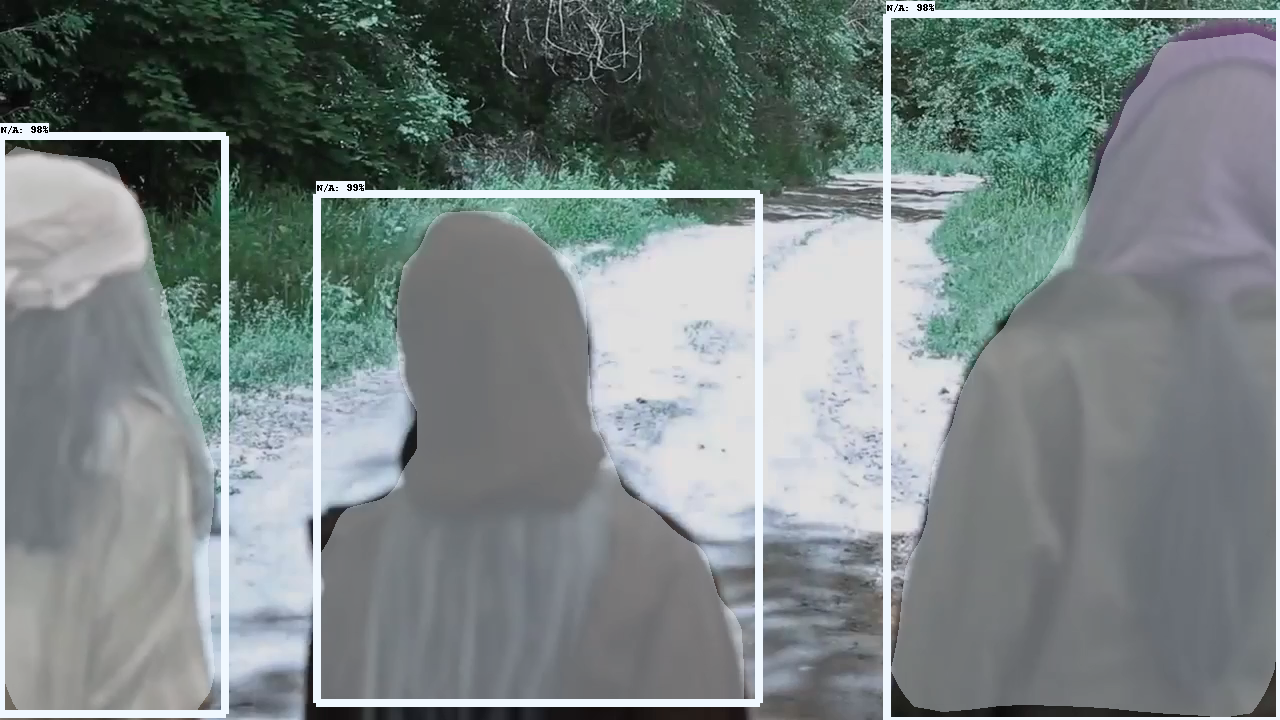

3


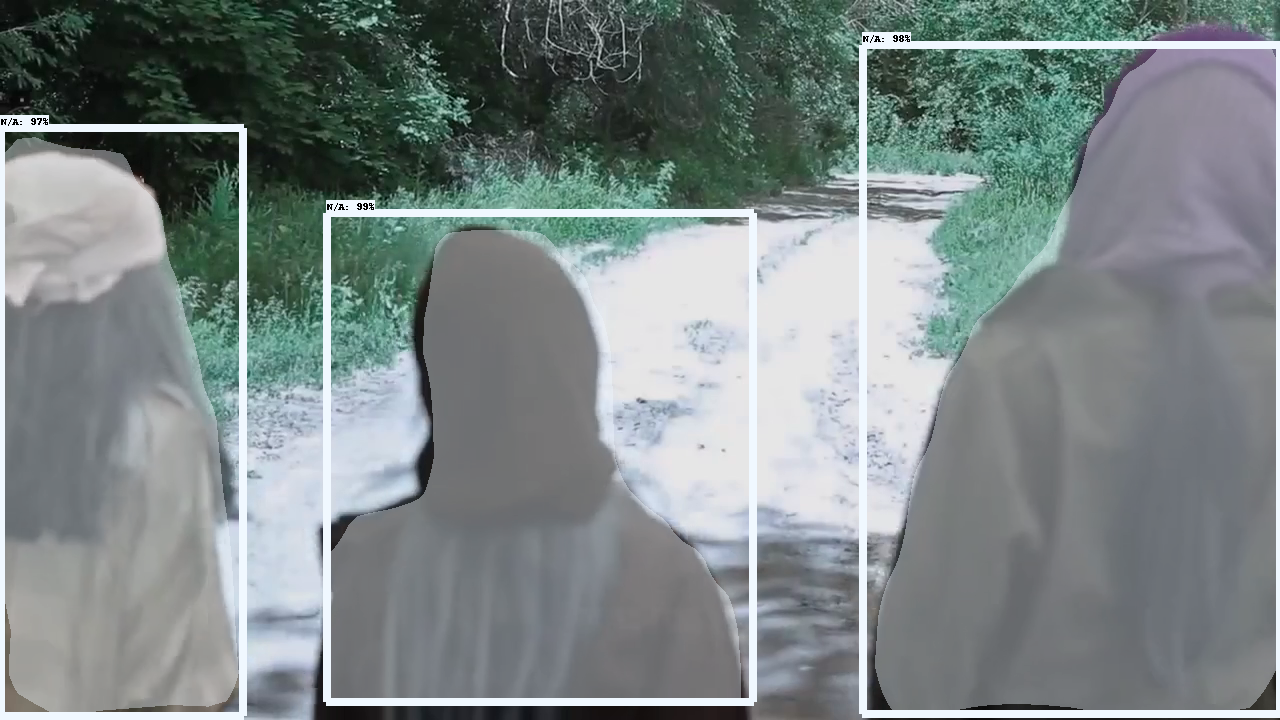

KeyboardInterrupt: ignored

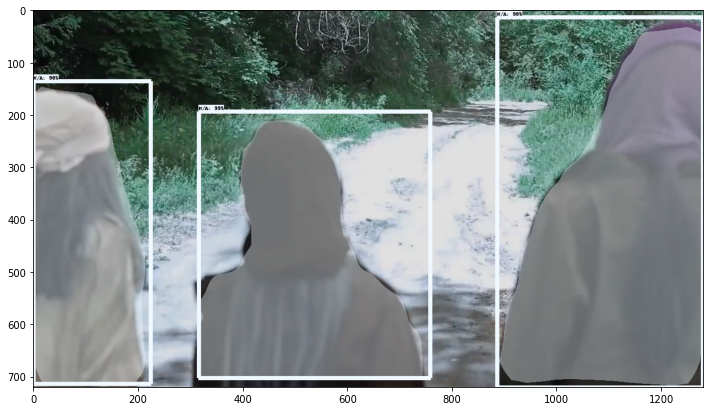

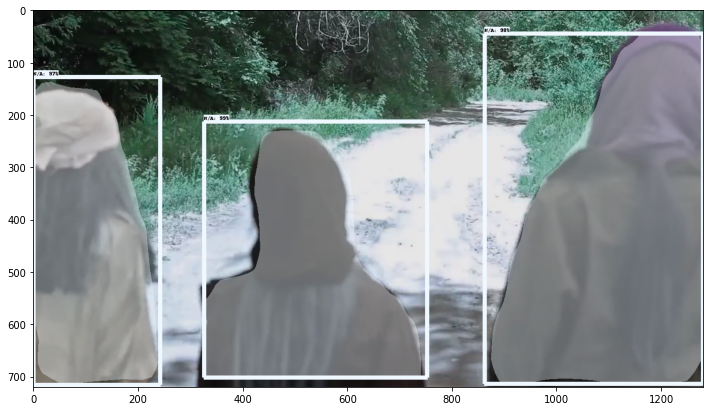

In [15]:
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('drive/My Drive/Человек.mp4')
print("Did the video open? - ", cap.isOpened())
while(cap.isOpened()):
    ret, image = cap.read()
    
    detection(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    cv2_imshow(gray)
    if cv2.waitKey(10) == 27: #Esc
        break

cap.release()
cv2.destroyAllWindows()